In [1]:
import pandas as pd
from pycaret.classification import setup, compare_models, pull
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)  # Show all columns


In [3]:
# Load the dataset
data = pd.read_excel('01_residential_data.xlsx')

# Display the first few rows of the dataset
data.head()

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,342000.0,1.373922,103.855621,10065.227930,847.235690
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,327000.0,1.361343,103.851699,8662.831360,928.311457
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,280000.0,1.370816,103.859192,9749.916281,1094.432471
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,425000.0,1.370816,103.859192,9749.916281,1094.432471
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,338000.0,1.362111,103.850767,8747.934242,822.147955


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176460 entries, 0 to 176459
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   block                176460 non-null  object 
 1   street_name          176460 non-null  object 
 2   town                 176460 non-null  object 
 3   postal_code          176460 non-null  int64  
 4   month                176460 non-null  object 
 5   flat_type            176460 non-null  object 
 6   storey_range         176460 non-null  object 
 7   floor_area_sqm       176460 non-null  float64
 8   flat_model           176460 non-null  object 
 9   lease_commence_date  176460 non-null  int64  
 10  resale_price         176460 non-null  float64
 11  latitude             176460 non-null  float64
 12  longitude            176460 non-null  float64
 13  cbd_dist             176460 non-null  float64
 14  min_dist_mrt         176460 non-null  float64
dtypes: float64(6), in

In [5]:
# Check for missing values
print(data.isnull().sum())

# Drop duplicates if any
data = data.drop_duplicates()

# Check data types
print(data.dtypes)


block                  0
street_name            0
town                   0
postal_code            0
month                  0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
latitude               0
longitude              0
cbd_dist               0
min_dist_mrt           0
dtype: int64
block                   object
street_name             object
town                    object
postal_code              int64
month                   object
flat_type               object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
latitude               float64
longitude              float64
cbd_dist               float64
min_dist_mrt           float64
dtype: object


In [6]:
# Statistical summary of numerical features
data.describe()


,postal_code,floor_area_sqm,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
count,176111.000000,176111.000000,176111.000000,1.761110e+05,176111.000000,176111.000000,176111.000000,176111.000000
mean,560830.030316,97.456673,1995.216273,4.794053e+05,1.367578,103.841660,12427.050410,831.440511
std,190789.050638,24.056909,13.624823,1.652550e+05,0.042731,0.071219,4396.456022,464.488938
min,50004.000000,31.000000,1966.000000,1.400000e+05,1.270380,103.644248,592.121638,36.079525
25%,510185.000000,82.000000,1985.000000,3.600000e+05,1.336960,103.781229,9680.740760,475.258524
50%,560564.000000,94.000000,1995.000000,4.480000e+05,1.367389,103.846466,13342.658210,744.883411
75%,730148.000000,113.000000,2005.000000,5.680000e+05,1.395792,103.899484,15446.806430,1104.947677
max,825195.000000,259.000000,2019.000000,1.500000e+06,1.457071,103.987804,23298.462280,3496.402761


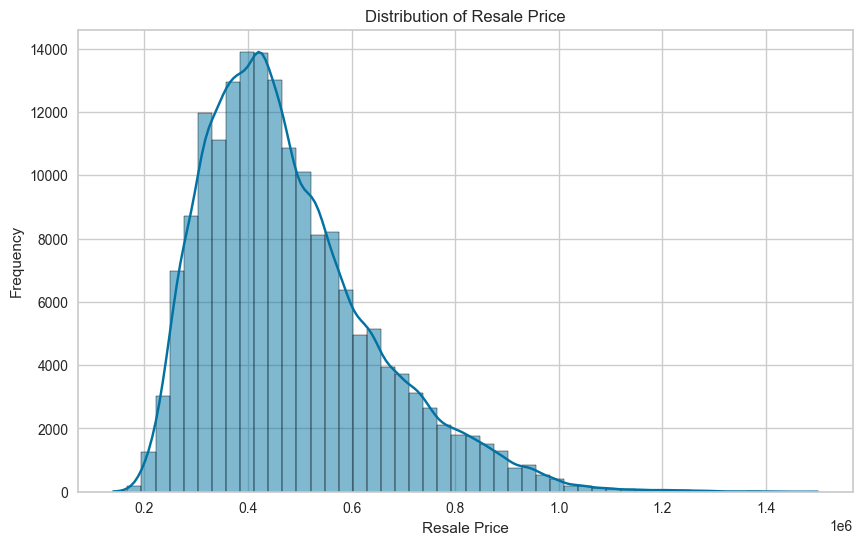

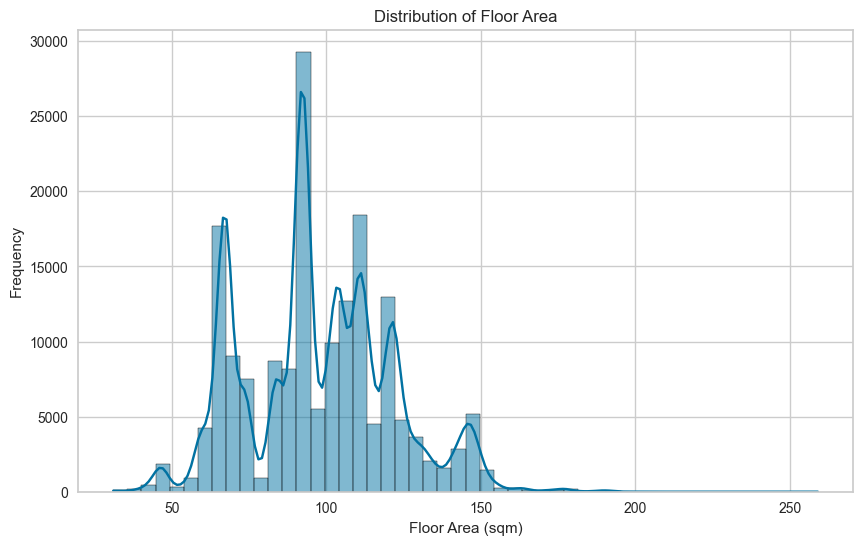

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of resale_price
plt.figure(figsize=(10, 6))
sns.histplot(data['resale_price'], bins=50, kde=True)
plt.title('Distribution of Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of floor_area
plt.figure(figsize=(10, 6))
sns.histplot(data['floor_area_sqm'], bins=50, kde=True)
plt.title('Distribution of Floor Area')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.show()


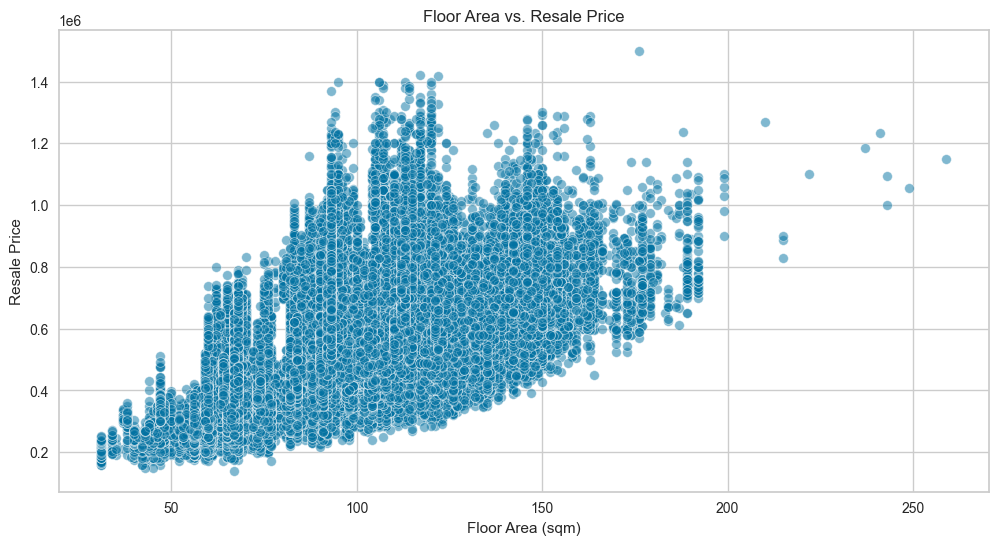

In [8]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='floor_area_sqm', y='resale_price', alpha=0.5)
plt.title('Floor Area vs. Resale Price')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.show()


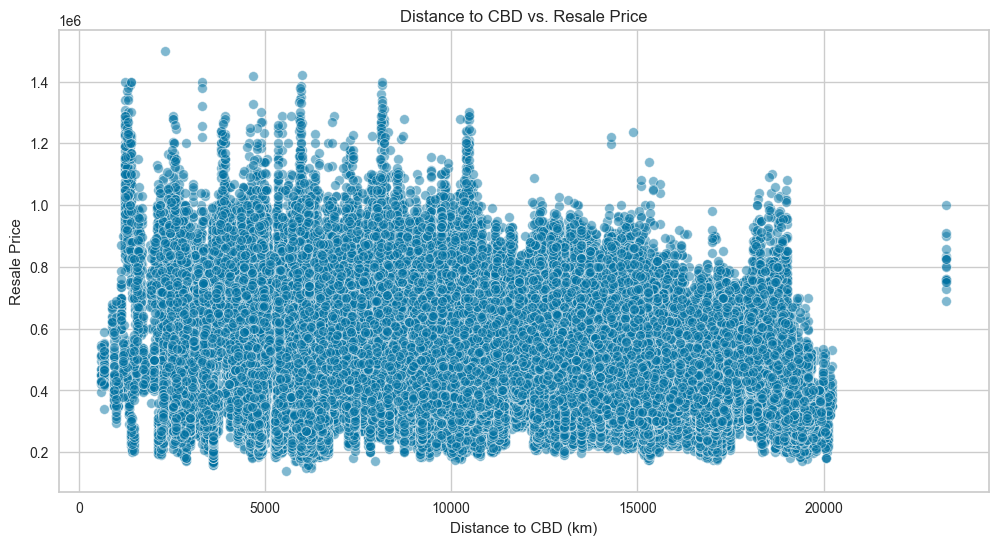

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='cbd_dist', y='resale_price', alpha=0.5)
plt.title('Distance to CBD vs. Resale Price')
plt.xlabel('Distance to CBD (km)')
plt.ylabel('Resale Price')
plt.show()


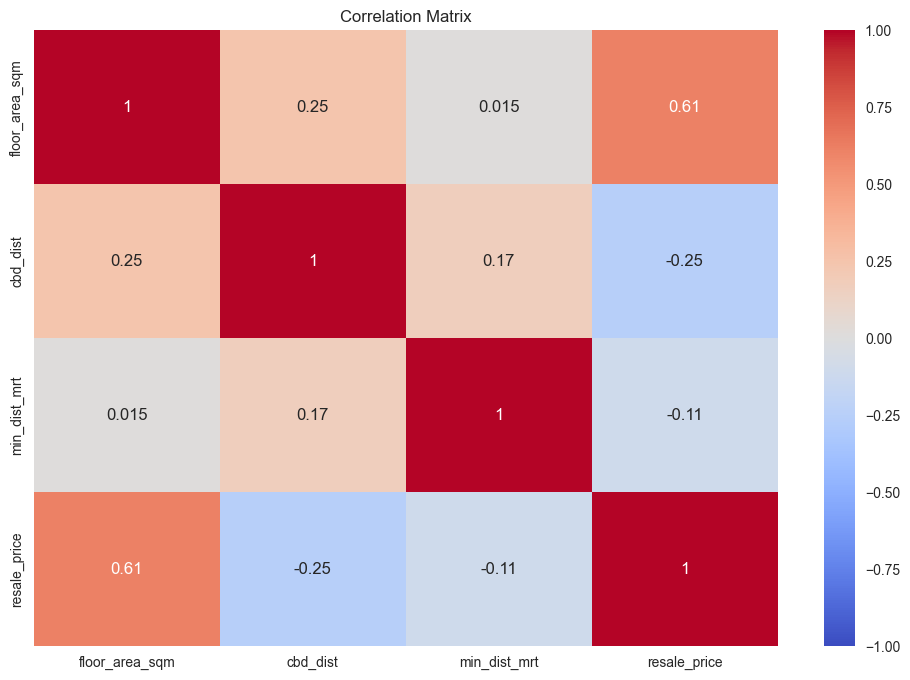

In [10]:
# Compute correlation matrix
corr_matrix = data[['floor_area_sqm', 'cbd_dist', 'min_dist_mrt', 'resale_price']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [11]:

# Convert 'month' to datetime
data['month'] = pd.to_datetime(data['month'], format='%Y-%m')

# Extract year and month from 'month'
data['year'] = data['month'].dt.year

# Convert 'lease_commence_date' to datetime, assuming it's a year only
data['lease_commence_date'] = pd.to_datetime(data['lease_commence_date'], format='%Y')
data['lease_year'] = data['lease_commence_date'].dt.year

# Calculate the age of the flat
data['age_of_flat'] = data['year'] - data['lease_year']

# Assume a standard lease duration of 99 years
standard_lease_duration = 99

# Calculate the remaining lease duration
data['lease_left'] = standard_lease_duration - data['age_of_flat']

# Drop all columns except 'lease_left'
columns_to_drop = ['month', 'year', 'lease_commence_date', 'lease_year', 'age_of_flat']
data = data.drop(columns=columns_to_drop)

# Check the updated DataFrame
data.head()

,block,street_name,town,postal_code,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,latitude,longitude,cbd_dist,min_dist_mrt,lease_left
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,3 ROOM,04 TO 06,68.0,New Generation,342000.0,1.373922,103.855621,10065.227930,847.235690,64
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,3 ROOM,10 TO 12,68.0,New Generation,327000.0,1.361343,103.851699,8662.831360,928.311457,64
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,3 ROOM,01 TO 03,67.0,New Generation,280000.0,1.370816,103.859192,9749.916281,1094.432471,63
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,4 ROOM,07 TO 09,92.0,New Generation,425000.0,1.370816,103.859192,9749.916281,1094.432471,63
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,3 ROOM,10 TO 12,68.0,New Generation,338000.0,1.362111,103.850767,8747.934242,822.147955,64


In [12]:

# # Initialize PyCaret setup
# # Initialize PyCaret setup with corrected group_features format

from pycaret.regression import * 
exp = setup(data=data, 
            target='resale_price', 
            session_id=123, 
            normalize=True, 
            bin_numeric_features=['floor_area_sqm', 'lease_left', 'cbd_dist',	'min_dist_mrt'],  
            categorical_features=['flat_type', 'flat_model', 'storey_range'],
            ignore_features=['block', 'street_name', 'postal_code', 'town', 'latitude',	'longitude'],
            pca=True,
            pca_components=25,  
            remove_outliers=True,
            log_experiment=True,
            experiment_name='resale_price_prediction',
            verbose=True)




,Description,Value
0,Session id,123
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(176111, 14)"
4,Transformed data shape,"(169958, 26)"
5,Transformed train set shape,"(117124, 26)"
6,Transformed test set shape,"(52834, 26)"
7,Ignore features,6
8,Numeric features,4
9,Categorical features,3


In [13]:
# Compare different models
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,50951.8246,4549879051.8648,67448.5875,0.8335,0.1360,0.1091,31.9010
catboost,CatBoost Regressor,51945.7559,4614226924.0919,67923.5550,0.8312,0.1371,0.1113,52.2850
xgboost,Extreme Gradient Boosting,51652.2395,4621627955.2000,67979.0938,0.8309,0.1364,0.1103,14.9200
rf,Random Forest Regressor,51094.2907,4622297461.1259,67983.2238,0.8309,0.1370,0.1094,46.6150
lightgbm,Light Gradient Boosting Machine,54227.4019,4968226939.4069,70482.7758,0.8182,0.1424,0.1165,30.1470
dt,Decision Tree Regressor,52009.3997,4971766845.1527,70496.6583,0.8180,0.1403,0.1110,5.4800
knn,K Neighbors Regressor,55067.0289,5478334412.8000,74011.5344,0.7995,0.1461,0.1163,14.3920
gbr,Gradient Boosting Regressor,60506.9085,6136159234.8642,78330.6276,0.7755,0.1573,0.1301,41.8110
lar,Least Angle Regression,75059.8443,9518749352.3196,97562.6449,0.6517,0.1949,0.1620,4.6500
llar,Lasso Least Angle Regression,75033.7130,9527100273.4139,97606.2998,0.6514,0.1961,0.1619,4.0920


In [14]:
# Evaluate the best model
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

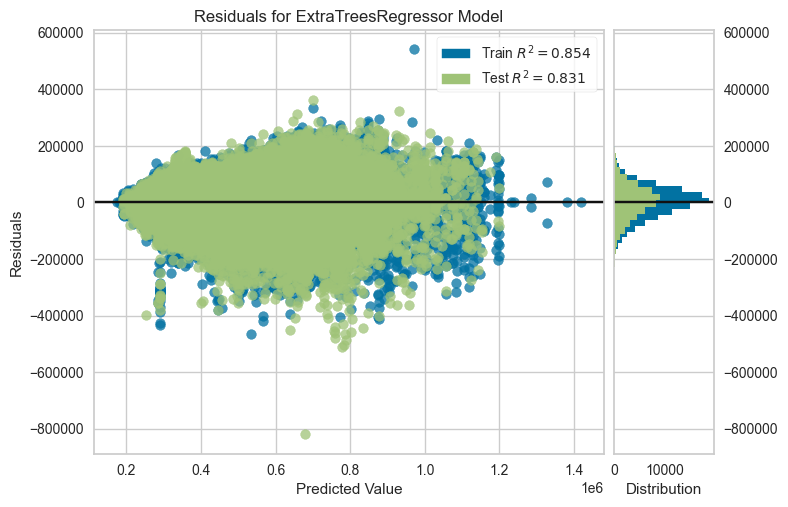

In [15]:
# plot residuals
plot_model(best_model, plot = 'residuals')

In [16]:
# predict on test set
holdout_pred = predict_model(best_model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,51132.7637,4602528766.9663,67841.9396,0.8311,0.1356,0.1091


In [17]:
# show predictions df
holdout_pred.head()

,flat_type,storey_range,floor_area_sqm,flat_model,cbd_dist,min_dist_mrt,lease_left,resale_price,prediction_label
35,3 ROOM,07 TO 09,73.0,Model A,13359.442383,315.864410,66,326000.0,340311.341463
21577,5 ROOM,13 TO 15,113.0,Premium Apartment,14340.946289,1389.423096,95,636000.0,686556.669565
53552,4 ROOM,01 TO 03,100.0,Model A,18089.962891,777.154297,78,315000.0,344634.248521
164556,4 ROOM,13 TO 15,100.0,Model A,10847.189453,1094.714111,74,548000.0,577490.666667
153952,4 ROOM,07 TO 09,91.0,Premium Apartment,14540.222656,211.665710,80,645000.0,517750.000000


In [18]:
 # save pipeline
save_model(best_model, 'price_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['floor_area_sqm', 'cbd_dist',
                                              'min_dist_mrt', 'lease_left'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['flat_type', 'flat_model',
                                              'storey_range'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  Tran...
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
                 ('remove_outliers',
                  TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                 ('normalize', TransformerWrapper(transformer=StandardScal